In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
filepath = '/content/gdrive/My Drive/tabular_playground/'
train = pd.read_csv(filepath+'train.csv')
test=pd.read_csv(filepath+'test.csv')

Mounted at /content/gdrive


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [ ]:
test.info() # test 데이터셋 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cont0   200000 non-null  float64
 12  cont1   200000 non-null  float64
 13  cont2   200000 non-null  float64
 14  cont3   200000 non-null  float64
 15  cont4   200000 non-null  float64
 16  cont5   200000 non-null  float64
 17  cont6   200000 non-null  float64
 18  cont7   200000 non-null  float64
 19  cont8   200000 non-null  float64
 20  cont9   200000 non-null  float64
 21  cont10  20

In [ ]:
cat_cols = [feature for feature in train.columns if 'cat' in feature]  #cat으로 시작하는 열 이름 모으기
num_cols=[num for num in train.columns if 'cont' in num]    #cont로 시작하는 열 이름 모으기
print(cat_cols)
print(num_cols)

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']


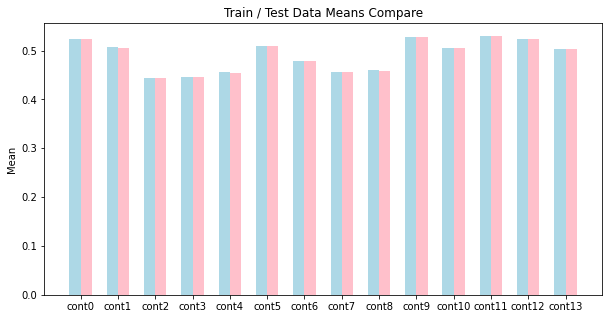

In [ ]:
# 먼저 자료들의 상태를 보자. 숫자로 이루어진 것부터 확인

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_mean = np.mean(train[num_cols])
test_mean = np.mean(test[num_cols])

x=np.arange(len(num_cols))
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
width=0.3
train_bar = axes.bar(x-width/2,train_mean,width,label='Train',color = 'lightblue')
test_bar = axes.bar(x+width/2,test_mean,width,label='Test',color='pink')

axes.set_ylabel('Mean')
axes.set_title('Train / Test Data Means Compare')

axes.set_xticks(x)
axes.set_xticklabels(num_cols)
plt.show()

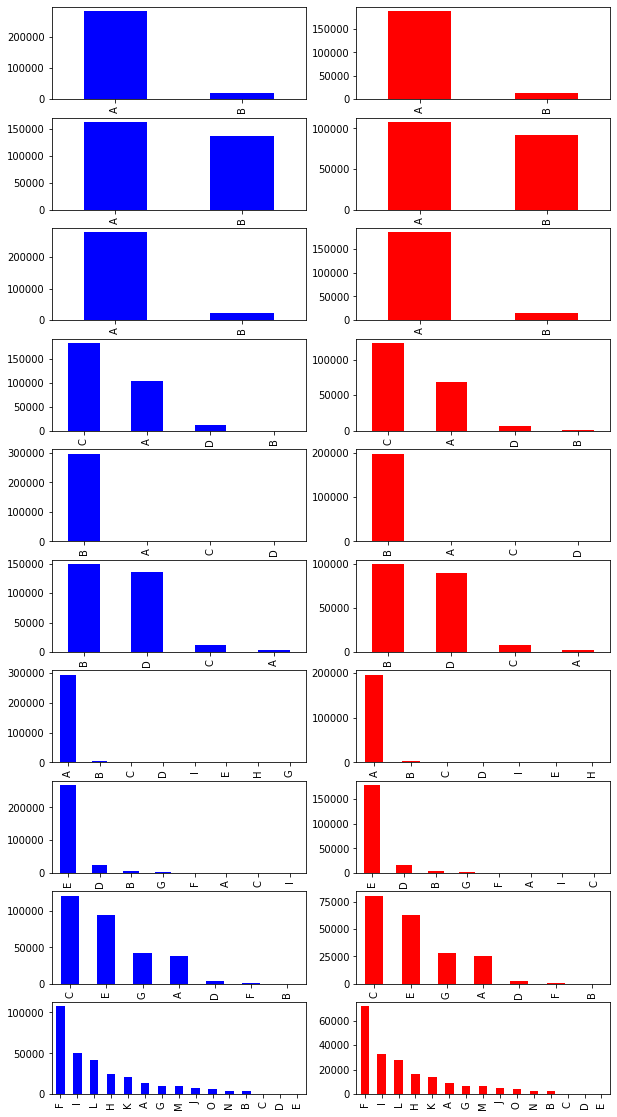

In [ ]:
# cat으로 시작하는 열들에 들어있는 알파벳 파악하기

train_cat = train[cat_cols]
test_cat=test[cat_cols]

fig,ax = plt.subplots(10,2,figsize=(10,20))
for i, col in enumerate(cat_cols):
  train_cat[col].value_counts().plot(kind='bar',ax=ax[i][0],label = col,color = 'blue')
  test_cat[col].value_counts().plot(kind='bar',ax=ax[i][1],label=col,color = 'red')

In [ ]:
# cat카테고리들에 들어있는 알파벳의 범위를 알아보자.
data = pd.concat([train, test], sort=False)  #train과 test 데이터셋 합쳐서 한번에 확인
set(data['cat0']) | set(data['cat1']) |set(data['cat2']) | set(data['cat3']) | set(data['cat4']) | set(data['cat5']) | set(data['cat6']) | set(data['cat7']) | set(data['cat8'])|set(data['cat9'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'}

In [ ]:
# get_dummies 이용해서 one-hot 인코딩 한번에 하기
column_B=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
one_data=pd.get_dummies(data,columns=column_B)
train=one_data[:len(train)]
test=one_data[len(train):]

In [ ]:
train.head()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,cat0_A,cat0_B,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat3_C,cat3_D,cat4_A,cat4_B,cat4_C,cat4_D,cat5_A,cat5_B,cat5_C,cat5_D,cat6_A,cat6_B,cat6_C,cat6_D,cat6_E,cat6_G,cat6_H,cat6_I,cat7_A,cat7_B,cat7_C,cat7_D,cat7_E,cat7_F,cat7_G,cat7_I,cat8_A,cat8_B,cat8_C,cat8_D,cat8_E,cat8_F,cat8_G,cat9_A,cat9_B,cat9_C,cat9_D,cat9_E,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
0,1,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,6,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,cat0_A,cat0_B,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat3_C,cat3_D,cat4_A,cat4_B,cat4_C,cat4_D,cat5_A,cat5_B,cat5_C,cat5_D,cat6_A,cat6_B,cat6_C,cat6_D,cat6_E,cat6_G,cat6_H,cat6_I,cat7_A,cat7_B,cat7_C,cat7_D,cat7_E,cat7_F,cat7_G,cat7_I,cat8_A,cat8_B,cat8_C,cat8_D,cat8_E,cat8_F,cat8_G,cat9_A,cat9_B,cat9_C,cat9_D,cat9_E,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
0,0,0.331261,0.551131,0.486284,0.156058,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448,NaN,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5,0.402404,0.617546,0.296852,0.187440,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251,NaN,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15,0.530677,0.618126,0.760865,0.199872,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905,NaN,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,16,0.439653,0.487403,0.715786,0.192808,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625,NaN,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,17,0.389844,0.752760,0.315269,0.191734,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931,NaN,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# id 삭제하고, train셋에 있는 target은 y로 빼두고, train 데이터 셋에서 validation set과 7:3비율로 나눔
from sklearn.model_selection import train_test_split
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
y_train = train['target']
X_train = train.drop('target', axis=1)
X_test = test.drop('target',axis=1) # one-hot인코딩 하면서 target열이 생겨버림
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state = 0,shuffle=True)
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_valid = ", X_valid.shape)
print("y_valid = ", y_valid.shape)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



X_train =  (210000, 70)
y_train =  (210000,)
X_valid =  (90000, 70)
y_valid =  (90000,)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb

In [ ]:
#XGBoost 모델
model = xgb.XGBRegressor(objective = 'reg:squarederror')
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_valid_predict = model.predict(X_valid)

print("Validation accuracy : "+ str(mean_squared_error(y_valid, y_valid_predict, squared=False)))

Validation accuracy : 0.8527813499610853


In [ ]:
# 랜덤포레스트 모델
r_freg = RandomForestRegressor() 
r_freg.fit(X_train,y_train)
r_valid_pred=r_freg.predict(X_valid)

print("Validation accuracy : "+ str(mean_squared_error(y_valid, r_valid_pred, squared=False)))

Validation accuracy : 0.8583270425513644


In [ ]:
#K - 이웃 모델
kn_reg=KNeighborsRegressor()
kn_reg.fit(X_train,y_train)
kn_valid_pred=kn_reg.predict(X_valid)
print("Validation accuracy : "+str(mean_squared_error(y_valid,kn_valid_pred,squared=False)))

Validation accuracy : 0.9437783205499503


In [ ]:
#LightGBM 모델
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_valid_predict = model.predict(X_valid)
print("Validation accuracy : "+ str(mean_squared_error(y_valid, y_valid_predict, squared=False)))

Validation accuracy : 0.8465270061573501


**정확도는 K-이웃 < 랜덤포레스트  < XGBoost < LGBM 순으로 볼 수 있다.**

# Q.***one-hot인코딩으로만 될까?*** -> get_dummies를 쓰지 않고, 모델을 돌려봄

In [ ]:
train = pd.read_csv(filepath+'train.csv')
test=pd.read_csv(filepath+'test.csv')

cat_cols = [feature for feature in train.columns if 'cat' in feature]

#get_dummies 없이 LabelEncoder만 사용해봄
from sklearn.preprocessing import LabelEncoder
for i in cat_cols:
  le = LabelEncoder()
  train[i] = le.fit_transform(train[i])
  test[i]=le.fit_transform(test[i])
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,0,1,0,0,1,3,0,4,2,8,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,1,0,0,0,1,1,0,4,0,5,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,0,0,0,2,1,3,0,1,2,13,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,0,0,0,2,1,3,0,4,6,10,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,0,1,0,0,1,1,0,4,2,5,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [ ]:
from sklearn.model_selection import train_test_split
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
y_train = train['target']
X_train = train.drop('target', axis=1)
X_test = test
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state = 0,shuffle=True)
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_valid = ", X_valid.shape)
print("y_valid = ", y_valid.shape)

X_train =  (210000, 24)
y_train =  (210000,)
X_valid =  (90000, 24)
y_valid =  (90000,)


In [ ]:
#XGBoost 모델
model = xgb.XGBRegressor(objective = 'reg:squarederror')
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_valid_predict = model.predict(X_valid)
print("XGBoost : "+ str(mean_squared_error(y_valid, y_valid_predict, squared=False)))

XGBoost : 0.853603839588347


In [ ]:
# 랜덤포레스트 모델
r_freg = RandomForestRegressor()
r_freg.fit(X_train,y_train)
r_valid_pred=r_freg.predict(X_valid)
print("RandomForest : "+ str(mean_squared_error(y_valid, r_valid_pred, squared=False)))

RandomForest : 0.8594978097411167


In [ ]:
#K - 이웃 모델
kn_reg=KNeighborsRegressor()
kn_reg.fit(X_train,y_train)
kn_valid_pred=kn_reg.predict(X_valid)
print("KNeighbors : "+str(mean_squared_error(y_valid,kn_valid_pred,squared=False)))

KNeighbors : 0.9443564726456494


In [ ]:
#LightGBM 모델
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_valid_predict = model.predict(X_valid)
print("LightGBM : "+ str(mean_squared_error(y_valid, y_valid_predict, squared=False)))

LightGBM : 0.847131188751322


**(거의 바뀐게 없음 -> 굳에 get_dummies해서 속성 늘릴 필요없다)**

# **Q. cat N 열 중에서 한 쪽으로 치우쳐진 열들 삭제하고 돌리면 어떻게 될까?**

In [ ]:
train = pd.read_csv(filepath+'train.csv')
test=pd.read_csv(filepath+'test.csv')

cat_cols = [feature for feature in train.columns if 'cat' in feature]

for i in cat_cols:
  le = LabelEncoder()
  train[i] = le.fit_transform(train[i])
  test[i]=le.fit_transform(test[i])

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

#한쪽으로 치우쳐진 칼럼들 삭제
column_B=['cat0','cat2','cat4','cat6']
train=train.drop(columns=column_B)
test=test.drop(columns=column_B)

y_train = train['target']
X_train = train.drop('target', axis=1)
X_test = test
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state = 0,shuffle=True)
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_valid = ", X_valid.shape)
print("y_valid = ", y_valid.shape)

X_train =  (210000, 20)
y_train =  (210000,)
X_valid =  (90000, 20)
y_valid =  (90000,)


In [ ]:
X_train.head() #cat 0,2,4,6 삭제된 것을 확인

,cat1,cat3,cat5,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
79000,0,0,1,3,2,5,0.510176,0.686176,0.413227,0.322992,0.281066,0.405013,0.322998,0.268635,0.482107,0.499394,0.693354,0.454693,0.354028,0.292017
222163,0,0,3,4,2,10,0.445167,0.650306,0.945686,0.321744,0.281987,0.405653,0.728504,0.291824,0.444295,0.852586,0.631577,0.833430,0.824190,0.301061
147313,0,2,3,4,0,10,0.879241,0.553828,0.192191,0.405422,0.555263,0.249035,0.487859,0.579227,0.916901,0.327028,0.942982,0.286447,0.893631,0.235848
201668,0,2,1,4,2,7,0.484613,0.660282,0.482538,0.184473,0.786267,0.378868,0.696257,0.427809,0.421157,0.692904,0.610985,0.823741,0.328265,0.717045
143237,0,2,3,4,2,5,0.667760,0.635105,0.446780,0.548689,0.434596,0.684889,0.698190,0.877668,0.715896,0.829331,0.689243,0.823101,0.831883,0.279603


In [ ]:
#XGBoost 모델
model = xgb.XGBRegressor(objective = 'reg:squarederror')
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_valid_predict = model.predict(X_valid)

print("XGBoost  : "+ str(mean_squared_error(y_valid, y_valid_predict, squared=False)))

# 랜덤포레스트 모델
r_freg = RandomForestRegressor() 
r_freg.fit(X_train,y_train)
r_valid_pred=r_freg.predict(X_valid)

print("RandomForest : "+ str(mean_squared_error(y_valid, r_valid_pred, squared=False)))

#K - 이웃 모델
kn_reg=KNeighborsRegressor()
kn_reg.fit(X_train,y_train)
kn_valid_pred=kn_reg.predict(X_valid)
print("KNeighbors : "+str(mean_squared_error(y_valid,kn_valid_pred,squared=False)))

#LightGBM 모델
model = lgb.LGBMRegressor(random_state=42)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_valid_predict = model.predict(X_valid)
print("LightGBM : "+ str(mean_squared_error(y_valid, y_valid_predict, squared=False)))

XGBoost accuracy : 0.8561692245211675
RandomForest accuracy : 0.9012204468792466
KNeighbors accuracy : 0.9470914809154038
LightGBM accuracy : 0.8500305438252181


**열 삭제시 오차가 더 커지는 경우도 있음 -> LightGBM, RandomForest**

결론-> 속성들 삭제하지 않고, 전부 사용

# LightGBM과 XGBoost 성능 높이기

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb

train = pd.read_csv(filepath+'train.csv')
test=pd.read_csv(filepath+'test.csv')

cat_cols = [feature for feature in train.columns if 'cat' in feature]

for i in cat_cols:
  le = LabelEncoder()
  train[i] = le.fit_transform(train[i])
  test[i]=le.fit_transform(test[i])

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

y_train = train['target']
X_train = train.drop('target', axis=1)
X_test = test
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state = 0,shuffle=True)

print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_valid = ", X_valid.shape)
print("y_valid = ", y_valid.shape)

X_train =  (210000, 24)
y_train =  (210000,)
X_valid =  (90000, 24)
y_valid =  (90000,)


In [ ]:
X_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
79000,0,0,0,0,1,1,0,3,2,5,0.510176,0.686176,0.413227,0.322992,0.281066,0.405013,0.322998,0.268635,0.482107,0.499394,0.693354,0.454693,0.354028,0.292017
222163,0,0,0,0,1,3,0,4,2,10,0.445167,0.650306,0.945686,0.321744,0.281987,0.405653,0.728504,0.291824,0.444295,0.852586,0.631577,0.833430,0.824190,0.301061
147313,0,0,0,2,1,3,0,4,0,10,0.879241,0.553828,0.192191,0.405422,0.555263,0.249035,0.487859,0.579227,0.916901,0.327028,0.942982,0.286447,0.893631,0.235848
201668,0,0,0,2,1,1,0,4,2,7,0.484613,0.660282,0.482538,0.184473,0.786267,0.378868,0.696257,0.427809,0.421157,0.692904,0.610985,0.823741,0.328265,0.717045
143237,0,0,0,2,1,3,0,4,2,5,0.667760,0.635105,0.446780,0.548689,0.434596,0.684889,0.698190,0.877668,0.715896,0.829331,0.689243,0.823101,0.831883,0.279603


# GridSearchCV 사용

In [ ]:
#GridSearchCV - LightGBM
LGB=lgb.LGBMRegressor(random_state=42)
lgb_param={'learning_rate':[0.01,0.1],'n_estimators': [200,500,1000], 'max_depth':[8,10]}
#학습율 (작을수록 느려짐), 부스팅 스테이지 수 (defalut=100), 트리 깊이 (과대적합 방지 default=3), 
gs_LGB=GridSearchCV(LGB,param_grid = lgb_param,cv=5,scoring='neg_mean_squared_error',n_jobs=4, verbose=1)
gs_LGB.fit(X_train,y_train)
LGB_best = gs_LGB.best_estimator_
print(LGB_best)
print(gs_LGB.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 10.9min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 13.8min finished


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=8,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
-0.715323512311314


In [ ]:
# GridSearch를 통해 얻은 최적의 파라미터 적용 - LightGBM
model = lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=8,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_valid_predict = model.predict(X_valid)
print("LightGBM  : "+ str(mean_squared_error(y_valid, y_valid_predict, squared=False)))

LightGBM  : 0.845718291978448


In [ ]:
sub = pd.read_csv(filepath+'sample_submission.csv')
lg_pred = model.predict(X_test)
sub['target'] = lg_pred
sub.to_csv(filepath+'Grid_LightGBM.csv', index =False)
sub.head()

,id,target
0,0,7.595940
1,5,7.786215
2,15,7.661554
3,16,7.366754
4,17,7.347327


In [ ]:
#GridSearchCV - XGBoost
#XGB=xgb.XGBRegressor(objective = 'reg:squarederror',random_state=42)
#xgb_param={'learning_rate':[0.01,0.1],'n_estimators': [200,500,1000], 'max_depth':[7,8],'subsample':[0.65,0.7,0.75]}
# 학습율 (작을수록 느려짐), 부스팅 스테이지 수 (defalut=100), 트리 깊이 (과대적합 방지 default=3), 
#gs_xgb=GridSearchCV(XGB, param_grid = lgb_param, cv=5, scoring='neg_mean_squared_error', n_jobs=8, verbose=1)
#gs_xgb.fit(X_train,y_train)
#XGB_best = gs_xgb.best_estimator_
#print(XGB_best)
#print(gs_xgb.best_score_)


#성능에 비해 너무 느리다. (1시간 이상 기다렸지만 나오지 않음) -> optuna한테 맡김

# OPTUNA 사용

In [ ]:
!pip install optuna  # optina 설치

     |████████████████████████████████| 296kB 4.8MB/s 
     |████████████████████████████████| 163kB 7.6MB/s 
     |████████████████████████████████| 81kB 4.8MB/s 
     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 112kB 10.1MB/s 
     |████████████████████████████████| 143kB 10.0MB/s 
     |████████████████████████████████| 51kB 3.9MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=0aaf32d8422712997f9b5165f97860576e39b047b0e602af55bd8b39ebad0ea1
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
import optuna

def objective(trial):
  params = {
        'metric': 'rmse', 
        'n_estimators': 10000,
        'learning_rate': trial.suggest_categorical('learning_rate', [0.005,0.01,0.03,0.1]),
        'random_state': 42,
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.35,0.4]),
        'subsample': trial.suggest_categorical('subsample', [0.5,0.55,0.6,0.65,0.7]),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10.0),
        'max_depth': trial.suggest_categorical('max_depth', [-1,10,20]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 300),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300)
    }
  model = lgb.LGBMRegressor(**params)   # **으로 안붙이면 오류걸림
  model.fit(X_train,y_train,eval_set=[(X_valid,y_valid)], early_stopping_rounds=300, verbose=True)
  lgb_op_pred = model.predict(X_valid)
  rmse = mean_squared_error(y_valid,lgb_op_pred,squared=False)
  return rmse

In [ ]:
study = optuna.create_study(direction='minimize') #오류 최소화
study.optimize(objective,n_trials=5) #5회반복

print('Best score : '+str(study.best_trial.value))

[I 2021-04-30 09:24:49,072] A new study created in memory with name: no-name-d0e84708-0a13-4799-b8af-dfeb4ff843cd


[1]	valid_0's rmse: 0.886351
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's rmse: 0.886188
[3]	valid_0's rmse: 0.886025
[4]	valid_0's rmse: 0.885887
[5]	valid_0's rmse: 0.885728
[6]	valid_0's rmse: 0.885626
[7]	valid_0's rmse: 0.885479
[8]	valid_0's rmse: 0.885344
[9]	valid_0's rmse: 0.88524
[10]	valid_0's rmse: 0.885098
[11]	valid_0's rmse: 0.884934
[12]	valid_0's rmse: 0.884791
[13]	valid_0's rmse: 0.884627
[14]	valid_0's rmse: 0.884536
[15]	valid_0's rmse: 0.884423
[16]	valid_0's rmse: 0.884304
[17]	valid_0's rmse: 0.884209
[18]	valid_0's rmse: 0.884068
[19]	valid_0's rmse: 0.883959
[20]	valid_0's rmse: 0.883837
[21]	valid_0's rmse: 0.8837
[22]	valid_0's rmse: 0.883583
[23]	valid_0's rmse: 0.883424
[24]	valid_0's rmse: 0.883295
[25]	valid_0's rmse: 0.883181
[26]	valid_0's rmse: 0.883068
[27]	valid_0's rmse: 0.882939
[28]	valid_0's rmse: 0.88281
[29]	valid_0's rmse: 0.882643
[30]	valid_0's rmse: 0.882513
[31]	valid_0's rmse: 0.882353
[32]	valid_0's rmse:

[I 2021-04-30 09:29:21,438] Trial 0 finished with value: 0.8436849897929612 and parameters: {'learning_rate': 0.005, 'colsample_bytree': 0.35, 'subsample': 0.65, 'reg_alpha': 0.047472201438085816, 'reg_lambda': 0.9196472372522835, 'max_depth': -1, 'num_leaves': 119, 'min_child_samples': 299}. Best is trial 0 with value: 0.8436849897929612.


[1]	valid_0's rmse: 0.886348
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's rmse: 0.88618
[3]	valid_0's rmse: 0.886015
[4]	valid_0's rmse: 0.885874
[5]	valid_0's rmse: 0.88571
[6]	valid_0's rmse: 0.885607
[7]	valid_0's rmse: 0.885451
[8]	valid_0's rmse: 0.885311
[9]	valid_0's rmse: 0.885205
[10]	valid_0's rmse: 0.88506
[11]	valid_0's rmse: 0.884889
[12]	valid_0's rmse: 0.884741
[13]	valid_0's rmse: 0.884573
[14]	valid_0's rmse: 0.88448
[15]	valid_0's rmse: 0.884363
[16]	valid_0's rmse: 0.884241
[17]	valid_0's rmse: 0.884145
[18]	valid_0's rmse: 0.884003
[19]	valid_0's rmse: 0.883892
[20]	valid_0's rmse: 0.883766
[21]	valid_0's rmse: 0.883627
[22]	valid_0's rmse: 0.883506
[23]	valid_0's rmse: 0.883343
[24]	valid_0's rmse: 0.88321
[25]	valid_0's rmse: 0.883095
[26]	valid_0's rmse: 0.882978
[27]	valid_0's rmse: 0.882845
[28]	valid_0's rmse: 0.88271
[29]	valid_0's rmse: 0.882542
[30]	valid_0's rmse: 0.882407
[31]	valid_0's rmse: 0.882243
[32]	valid_0's rmse: 0

[I 2021-04-30 09:34:24,185] Trial 1 finished with value: 0.8440084730360601 and parameters: {'learning_rate': 0.005, 'colsample_bytree': 0.35, 'subsample': 0.55, 'reg_alpha': 0.3969388485311385, 'reg_lambda': 0.5252629699321087, 'max_depth': -1, 'num_leaves': 176, 'min_child_samples': 10}. Best is trial 0 with value: 0.8436849897929612.


[1]	valid_0's rmse: 0.883424
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's rmse: 0.880725
[3]	valid_0's rmse: 0.879035
[4]	valid_0's rmse: 0.876872
[5]	valid_0's rmse: 0.875098
[6]	valid_0's rmse: 0.873625
[7]	valid_0's rmse: 0.872471
[8]	valid_0's rmse: 0.870751
[9]	valid_0's rmse: 0.869288
[10]	valid_0's rmse: 0.867515
[11]	valid_0's rmse: 0.866169
[12]	valid_0's rmse: 0.864811
[13]	valid_0's rmse: 0.86352
[14]	valid_0's rmse: 0.862598
[15]	valid_0's rmse: 0.861626
[16]	valid_0's rmse: 0.860723
[17]	valid_0's rmse: 0.860022
[18]	valid_0's rmse: 0.858855
[19]	valid_0's rmse: 0.858145
[20]	valid_0's rmse: 0.857505
[21]	valid_0's rmse: 0.856804
[22]	valid_0's rmse: 0.856377
[23]	valid_0's rmse: 0.855846
[24]	valid_0's rmse: 0.855179
[25]	valid_0's rmse: 0.85481
[26]	valid_0's rmse: 0.854315
[27]	valid_0's rmse: 0.853996
[28]	valid_0's rmse: 0.853694
[29]	valid_0's rmse: 0.85325
[30]	valid_0's rmse: 0.852934
[31]	valid_0's rmse: 0.852623
[32]	valid_0's rmse

[I 2021-04-30 09:34:39,055] Trial 2 finished with value: 0.8447664642893041 and parameters: {'learning_rate': 0.1, 'colsample_bytree': 0.4, 'subsample': 0.6, 'reg_alpha': 0.0052159869530236805, 'reg_lambda': 0.0077165605054975, 'max_depth': 10, 'num_leaves': 70, 'min_child_samples': 142}. Best is trial 0 with value: 0.8436849897929612.


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[279]	valid_0's rmse: 0.861525
[280]	valid_0's rmse: 0.861478
[281]	valid_0's rmse: 0.861411
[282]	valid_0's rmse: 0.861366
[283]	valid_0's rmse: 0.86132
[284]	valid_0's rmse: 0.861262
[285]	valid_0's rmse: 0.861195
[286]	valid_0's rmse: 0.861154
[287]	valid_0's rmse: 0.8611
[288]	valid_0's rmse: 0.861064
[289]	valid_0's rmse: 0.860994
[290]	valid_0's rmse: 0.860942
[291]	valid_0's rmse: 0.860894
[292]	valid_0's rmse: 0.860853
[293]	valid_0's rmse: 0.860799
[294]	valid_0's rmse: 0.860763
[295]	valid_0's rmse: 0.860711
[296]	valid_0's rmse: 0.860671
[297]	valid_0's rmse: 0.860622
[298]	valid_0's rmse: 0.860568
[299]	valid_0's rmse: 0.860514
[300]	valid_0's rmse: 0.860471
[301]	valid_0's rmse: 0.86043
[302]	valid_0's rmse: 0.860375
[303]	valid_0's rmse: 0.860329
[304]	valid_0's rmse: 0.86029
[305]	valid_0's rmse: 0.860255
[306]	valid_0's rmse: 0.860219
[307]	valid_0's rmse: 0.860174
[308]	valid_0's rmse: 0.860139
[309]	valid_0's rmse: 0.860082
[310]	va

[I 2021-04-30 09:39:56,424] Trial 3 finished with value: 0.8435119640836886 and parameters: {'learning_rate': 0.005, 'colsample_bytree': 0.4, 'subsample': 0.65, 'reg_alpha': 0.009969034536203751, 'reg_lambda': 0.023676230174757368, 'max_depth': 20, 'num_leaves': 94, 'min_child_samples': 84}. Best is trial 3 with value: 0.8435119640836886.


[1]	valid_0's rmse: 0.886256
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's rmse: 0.885943
[3]	valid_0's rmse: 0.885633
[4]	valid_0's rmse: 0.885364
[5]	valid_0's rmse: 0.885062
[6]	valid_0's rmse: 0.884869
[7]	valid_0's rmse: 0.884595
[8]	valid_0's rmse: 0.884346
[9]	valid_0's rmse: 0.884149
[10]	valid_0's rmse: 0.883879
[11]	valid_0's rmse: 0.883577
[12]	valid_0's rmse: 0.883319
[13]	valid_0's rmse: 0.883015
[14]	valid_0's rmse: 0.882844
[15]	valid_0's rmse: 0.882639
[16]	valid_0's rmse: 0.882419
[17]	valid_0's rmse: 0.882242
[18]	valid_0's rmse: 0.881982
[19]	valid_0's rmse: 0.881783
[20]	valid_0's rmse: 0.881565
[21]	valid_0's rmse: 0.881322
[22]	valid_0's rmse: 0.881124
[23]	valid_0's rmse: 0.880846
[24]	valid_0's rmse: 0.88062
[25]	valid_0's rmse: 0.880421
[26]	valid_0's rmse: 0.88022
[27]	valid_0's rmse: 0.880005
[28]	valid_0's rmse: 0.879788
[29]	valid_0's rmse: 0.879493
[30]	valid_0's rmse: 0.879272
[31]	valid_0's rmse: 0.878996
[32]	valid_0's rms

[I 2021-04-30 09:42:10,294] Trial 4 finished with value: 0.843795706473133 and parameters: {'learning_rate': 0.01, 'colsample_bytree': 0.35, 'subsample': 0.6, 'reg_alpha': 9.295321103200287e-05, 'reg_lambda': 1.9605705977573022, 'max_depth': -1, 'num_leaves': 82, 'min_child_samples': 242}. Best is trial 3 with value: 0.8435119640836886.


Best score : 0.8435119640836886


In [ ]:
study.best_params

{'colsample_bytree': 0.4,
 'learning_rate': 0.005,
 'max_depth': 20,
 'min_child_samples': 84,
 'num_leaves': 94,
 'reg_alpha': 0.009969034536203751,
 'reg_lambda': 0.023676230174757368,
 'subsample': 0.65}

In [ ]:
model = lgb.LGBMRegressor(colsample_bytree= 0.4,
                          learning_rate= 0.005,
                          max_depth= 20,
                          min_child_samples= 84,
                          num_leaves= 94,
                          reg_alpha= 0.009969034536203751,
                          reg_lambda= 0.023676230174757368,
                          subsample=0.65,metric='rmse', n_estimators= 10000,random_state= 42)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_valid_predict = model.predict(X_valid)
print("LightGBM  : "+ str(mean_squared_error(y_valid, y_valid_predict, squared=False)))

LightGBM  : 0.8441965941940158


In [ ]:
sub = pd.read_csv(filepath+'sample_submission.csv')
lg_pred = model.predict(X_test)
sub['target'] = lg_pred
sub.to_csv(filepath+'LightGBM_Optuna.csv', index =False)
sub.head()

,id,target
0,0,7.559230
1,5,7.848113
2,15,7.573315
3,16,7.506878
4,17,7.213755


In [1]:
import optuna
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
def objective(trial):
  params = {
        'metric': 'rmse', 
        'random_state': 47,
        'n_estimators': 10000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-1, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-1, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.2,0.3,0.4,0.1]),
        'subsample': trial.suggest_categorical('subsample', [0.6,0.65,0.7,0.75]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.05,0.01,0.03]),
        'max_depth': trial.suggest_categorical('max_depth', [8,10,12]),
        'num_leaves' : trial.suggest_int('num_leaves', 2, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 200),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 2, 100)
    }
  model = xgb.XGBRegressor(**params)
  model.fit(X_train,y_train,eval_set=[(X_valid,y_valid)], early_stopping_rounds=350, verbose=True)
  lgb_op_pred = model.predict(X_valid)
  rmse = mean_squared_error(y_valid,lgb_op_pred,squared=False)
  return rmse

ModuleNotFoundError: ignored

In [ ]:
study = optuna.create_study(direction='minimize') #오류 최소화
study.optimize(objective, n_trials=7)#7회반복

print('best_value : '+str(study.best_trial.value))

[I 2021-04-30 07:29:36,662] A new study created in memory with name: no-name-5eb2967d-0b49-4511-98d1-aa38dcce6da8


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[2213]	valid_0's rmse: 0.847894
[2214]	valid_0's rmse: 0.847894
[2215]	valid_0's rmse: 0.847893
[2216]	valid_0's rmse: 0.847891
[2217]	valid_0's rmse: 0.84789
[2218]	valid_0's rmse: 0.847885
[2219]	valid_0's rmse: 0.847885
[2220]	valid_0's rmse: 0.847885
[2221]	valid_0's rmse: 0.84788
[2222]	valid_0's rmse: 0.847877
[2223]	valid_0's rmse: 0.847874
[2224]	valid_0's rmse: 0.847871
[2225]	valid_0's rmse: 0.847868
[2226]	valid_0's rmse: 0.847868
[2227]	valid_0's rmse: 0.847866
[2228]	valid_0's rmse: 0.847866
[2229]	valid_0's rmse: 0.847863
[2230]	valid_0's rmse: 0.847861
[2231]	valid_0's rmse: 0.847858
[2232]	valid_0's rmse: 0.847857
[2233]	valid_0's rmse: 0.847856
[2234]	valid_0's rmse: 0.847854
[2235]	valid_0's rmse: 0.847851
[2236]	valid_0's rmse: 0.847852
[2237]	valid_0's rmse: 0.84785
[2238]	valid_0's rmse: 0.84785
[2239]	valid_0's rmse: 0.847847
[2240]	valid_0's rmse: 0.847847
[2241]	valid_0's rmse: 0.847845
[2242]	valid_0's rmse: 0.847843
[2243]	v

[I 2021-04-30 07:32:51,162] Trial 0 finished with value: 0.8448505036710477 and parameters: {'n_estimators': 7210, 'subsample': 0.65, 'num_leaves': 6, 'max_depth': 6, 'reg_alpha': 0.0032540763453392657, 'reg_lambda': 0.0323225062418518}. Best is trial 0 with value: 0.8448505036710477.


[1]	valid_0's rmse: 0.886032
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's rmse: 0.885615
[3]	valid_0's rmse: 0.885208
[4]	valid_0's rmse: 0.884807
[5]	valid_0's rmse: 0.884406
[6]	valid_0's rmse: 0.884021
[7]	valid_0's rmse: 0.883639
[8]	valid_0's rmse: 0.883259
[9]	valid_0's rmse: 0.882893
[10]	valid_0's rmse: 0.882534
[11]	valid_0's rmse: 0.882179
[12]	valid_0's rmse: 0.881826
[13]	valid_0's rmse: 0.881463
[14]	valid_0's rmse: 0.88112
[15]	valid_0's rmse: 0.88077
[16]	valid_0's rmse: 0.880428
[17]	valid_0's rmse: 0.880083
[18]	valid_0's rmse: 0.879753
[19]	valid_0's rmse: 0.879424
[20]	valid_0's rmse: 0.879106
[21]	valid_0's rmse: 0.878798
[22]	valid_0's rmse: 0.878492
[23]	valid_0's rmse: 0.878192
[24]	valid_0's rmse: 0.877902
[25]	valid_0's rmse: 0.877611
[26]	valid_0's rmse: 0.877332
[27]	valid_0's rmse: 0.877054
[28]	valid_0's rmse: 0.87677
[29]	valid_0's rmse: 0.876499
[30]	valid_0's rmse: 0.876236
[31]	valid_0's rmse: 0.875973
[32]	valid_0's rmse

[I 2021-04-30 07:35:30,510] Trial 1 finished with value: 0.8460022237321998 and parameters: {'n_estimators': 5297, 'subsample': 0.65, 'num_leaves': 275, 'max_depth': 8, 'reg_alpha': 1.7765081900838033, 'reg_lambda': 0.004080350949559386}. Best is trial 0 with value: 0.8448505036710477.


[1]	valid_0's rmse: 0.886061
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's rmse: 0.88567
[3]	valid_0's rmse: 0.885284
[4]	valid_0's rmse: 0.884905
[5]	valid_0's rmse: 0.884532
[6]	valid_0's rmse: 0.884172
[7]	valid_0's rmse: 0.88381
[8]	valid_0's rmse: 0.883459
[9]	valid_0's rmse: 0.883113
[10]	valid_0's rmse: 0.88278
[11]	valid_0's rmse: 0.882442
[12]	valid_0's rmse: 0.882102
[13]	valid_0's rmse: 0.881769
[14]	valid_0's rmse: 0.881438
[15]	valid_0's rmse: 0.881114
[16]	valid_0's rmse: 0.880796
[17]	valid_0's rmse: 0.880492
[18]	valid_0's rmse: 0.880191
[19]	valid_0's rmse: 0.879888
[20]	valid_0's rmse: 0.8796
[21]	valid_0's rmse: 0.87931
[22]	valid_0's rmse: 0.879033
[23]	valid_0's rmse: 0.878756
[24]	valid_0's rmse: 0.878479
[25]	valid_0's rmse: 0.878202
[26]	valid_0's rmse: 0.877941
[27]	valid_0's rmse: 0.877674
[28]	valid_0's rmse: 0.877422
[29]	valid_0's rmse: 0.877167
[30]	valid_0's rmse: 0.876924
[31]	valid_0's rmse: 0.876673
[32]	valid_0's rmse: 0

[I 2021-04-30 07:38:04,038] Trial 2 finished with value: 0.8453818514527257 and parameters: {'n_estimators': 5282, 'subsample': 0.65, 'num_leaves': 284, 'max_depth': 7, 'reg_alpha': 0.005959629572286338, 'reg_lambda': 5.043394386858588}. Best is trial 0 with value: 0.8448505036710477.


[1]	valid_0's rmse: 0.886059
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's rmse: 0.885668
[3]	valid_0's rmse: 0.885283
[4]	valid_0's rmse: 0.884905
[5]	valid_0's rmse: 0.884533
[6]	valid_0's rmse: 0.884169
[7]	valid_0's rmse: 0.883813
[8]	valid_0's rmse: 0.883462
[9]	valid_0's rmse: 0.883118
[10]	valid_0's rmse: 0.882782
[11]	valid_0's rmse: 0.882444
[12]	valid_0's rmse: 0.882114
[13]	valid_0's rmse: 0.881784
[14]	valid_0's rmse: 0.88147
[15]	valid_0's rmse: 0.881156
[16]	valid_0's rmse: 0.880846
[17]	valid_0's rmse: 0.880544
[18]	valid_0's rmse: 0.880248
[19]	valid_0's rmse: 0.879952
[20]	valid_0's rmse: 0.879668
[21]	valid_0's rmse: 0.879384
[22]	valid_0's rmse: 0.879103
[23]	valid_0's rmse: 0.878829
[24]	valid_0's rmse: 0.878556
[25]	valid_0's rmse: 0.87829
[26]	valid_0's rmse: 0.878029
[27]	valid_0's rmse: 0.87777
[28]	valid_0's rmse: 0.877509
[29]	valid_0's rmse: 0.877263
[30]	valid_0's rmse: 0.877013
[31]	valid_0's rmse: 0.876768
[32]	valid_0's rmse

[I 2021-04-30 07:40:18,373] Trial 3 finished with value: 0.8450329276228632 and parameters: {'n_estimators': 8558, 'subsample': 0.6, 'num_leaves': 41, 'max_depth': 10, 'reg_alpha': 0.08023017638075738, 'reg_lambda': 0.4524654995439479}. Best is trial 0 with value: 0.8448505036710477.


[1]	valid_0's rmse: 0.886092
Training until validation scores don't improve for 300 rounds.
[2]	valid_0's rmse: 0.885731
[3]	valid_0's rmse: 0.885379
[4]	valid_0's rmse: 0.88503
[5]	valid_0's rmse: 0.884693
[6]	valid_0's rmse: 0.884362
[7]	valid_0's rmse: 0.884034
[8]	valid_0's rmse: 0.883712
[9]	valid_0's rmse: 0.883396
[10]	valid_0's rmse: 0.883074
[11]	valid_0's rmse: 0.88275
[12]	valid_0's rmse: 0.882442
[13]	valid_0's rmse: 0.882139
[14]	valid_0's rmse: 0.881831
[15]	valid_0's rmse: 0.881526
[16]	valid_0's rmse: 0.88124
[17]	valid_0's rmse: 0.880947
[18]	valid_0's rmse: 0.880665
[19]	valid_0's rmse: 0.880393
[20]	valid_0's rmse: 0.880121
[21]	valid_0's rmse: 0.879855
[22]	valid_0's rmse: 0.879593
[23]	valid_0's rmse: 0.87934
[24]	valid_0's rmse: 0.879092
[25]	valid_0's rmse: 0.878842
[26]	valid_0's rmse: 0.878588
[27]	valid_0's rmse: 0.87834
[28]	valid_0's rmse: 0.878114
[29]	valid_0's rmse: 0.877882
[30]	valid_0's rmse: 0.877652
[31]	valid_0's rmse: 0.877418
[32]	valid_0's rmse: 

[I 2021-04-30 07:42:56,672] Trial 4 finished with value: 0.8450681099534041 and parameters: {'n_estimators': 7724, 'subsample': 0.7, 'num_leaves': 63, 'max_depth': 6, 'reg_alpha': 1.5437214387815301, 'reg_lambda': 0.0017764390761159812}. Best is trial 0 with value: 0.8448505036710477.


Best score : 0.8448505036710477


In [ ]:
study.best_params

In [ ]:
xgb_model = xgb.XGBRegressor(metric='rmse',
                             random_state= 47,
                             n_estimators= 10000,
                             colsample_bytree= 0.3, 
                             learning_rate= 0.01,
                             max_depth= 8,
                             min_child_samples= 65,
                             min_data_per_groups= 46, 
                             num_leaves= 14,
                             reg_alpha= 9.915034437859982,
                             reg_lambda= 9.309784293509214,
                             subsample= 0.65)
xgb_model.fit(X_train,y_train)
y_train_predict = xgb_model.predict(X_train)
y_valid_predict = xgb_model.predict(X_valid)
print('XGBoost : '+str(mean_squared_error(y_valid,y_valid_predict,squared=False)))


In [ ]:
sub = pd.read_csv(filepath+'sample_submission.csv')
xgb_pred = xgb_model.predict(X_test)
sub['target'] = xgb_pred
sub.to_csv(filepath+'XGB_Optuna.csv', index =False)
sub.head()